In [1]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

# 스키마 정의
schema = StructType() \
.add('date', TimestampType(), True) \
.add('close', DoubleType(), True)

# 입력 스트림 데이터프레임 생성
inputCsv = spark.readStream.option("sep", ",").schema(schema).csv("/sparkdata/bitcoin/")

# 스트리밍 데이터프레임 연산
stream = inputCsv.select("*").where("close > 0")

# 질의 설정 및 데이터 저장
query = stream.writeStream.queryName("query").format("memory").start()

# 설정한 시간동안 스트림 데이터 입력 대기
query.awaitTermination(10)

False

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글폰트 전역 설정
plt.rcParams["font.family"]= 'NanumGothic'
plt.rcParams['font.size'] = 14.
plt.rcParams['axes.titlesize'] = 24.
plt.rcParams['axes.labelsize'] = 18.

# 스트리밍 데이터 분석
btc = spark.sql("SELECT * FROM query")

# 분석 데이터 그래프 시각화
btc.toPandas().plot(kind = 'line', x = 'date', y = 'close', figsize=(20, 10), xlabel = '날짜', ylabel = '단위: $', color = 'red', label = '비트코인')

plt.show()

In [1]:
# 노드 데이터프레임 생성
v = spark.createDataFrame([("NFT", "nft"), ("DeFi", "defi"), ("Contents", "ctt"), ("Gaming", "game"), ("Platform", "pfm"), \
("a", "AAVE"), ("b", "BAKE"), ("c", "ATOM"), ("d", "ADA"), ("e", "ETH"), ("f", "FLOW"), ("g", "GRT"), ("h", "HOT"), \
("i", "BAT"), ("j", "ENJ"), ("k", "LINK"), ("l", "LUNA"), ("m", "MANA"), ("n", "SOL"), ("o", "OGN"), ("p", "FTM"), \
("q", "AXS"), ("r", "ZRX"), ("s", "SAND"), ("t", "THETA"), ("u", "UNI"), ("v", "XVS"), ("w", "WAVES"), ("x", "SXP"), \
("y", "ALICE"), ("z", "CHZ")], ["id", "symbol"])
v.printSchema()

root
 |-- id: string (nullable = true)
 |-- symbol: string (nullable = true)



In [2]:
# 에지 데이터프레임 생성
e = spark.createDataFrame([("a", "NFT"), ("a", "Platform"), ("b", "NFT"), ("b", "DeFi"), ("c", "Contents"), ("c", "Platform"), \
("d", "Platform"), ("e", "Platform"), ("f", "NFT"), ("g", "DeFi"), ("h", "Platform"), ("i", "Contents"), ("j", "NFT"), \
("j", "Gaming"), ("k", "DeFi"), ("k", "Platform"), ("l", "DeFi"), ("m", "NFT"), ("m", "Gaming"), ("m", "Platform"), \
("n", "Platform"), ("o", "NFT"), ("p", "DeFi"), ("p", "Platform"), ("q", "NFT"), ("q", "Gaming"), ("r", "DeFi"), \
("r", "Platform"), ("s", "NFT"), ("s", "Contents"), ("s", "Gaming"), ("t", "Contents"), ("u", "DeFi"), ("v", "DeFi"), \
("w", "Platform"), ("x", "DeFi"), ("y", "Gaming"), ("z", "NFT"), ("z", "Contents")], ["src", "dst"])
e.printSchema()

root
 |-- src: string (nullable = true)
 |-- dst: string (nullable = true)



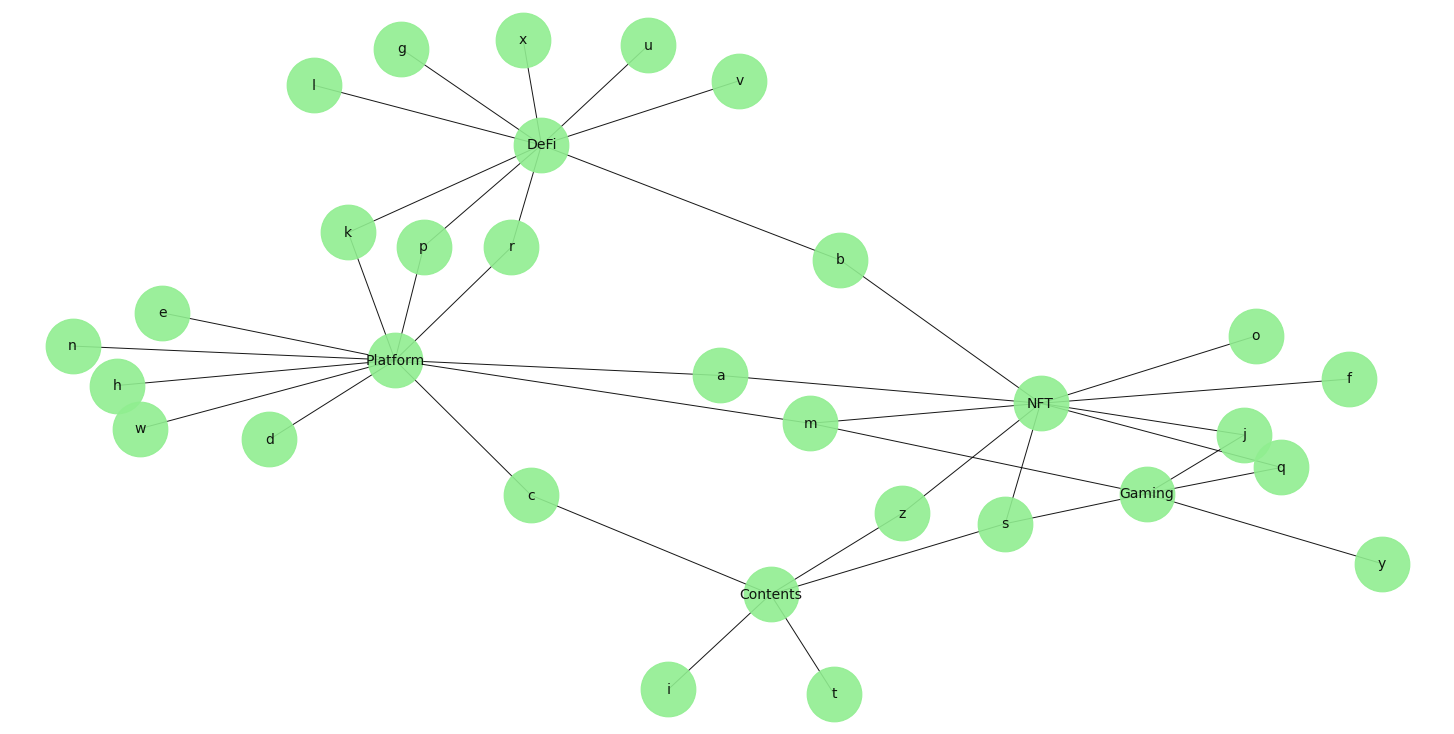

In [4]:
from graphframes import * # 그래프프레임 모듈 임포트
import networkx as nx # 시각화 모듈 임포트
import matplotlib.pyplot as plt

# 그래프프레임 생성
g = GraphFrame(v, e)

# 방향성 그래프 그리기
def PlotGraph(node_list, edge_list):
    Gplot=nx.Graph() # 비방향성 그래프 nx 객체 생성
    
    # nx 객체에 노드 추가
    for node in node_list.select('*').take(1000): # 데이터프레임을 take(최대 1000개) 사용하여 Row 객체 리스트 변환 후 반복
        Gplot.add_node(node['id'])

    edge_label = {} # 에지 라벨을 위한 딕셔너리
    for row in edge_list.select('src','dst').take(1000):
        Gplot.add_edge(row['src'],row['dst']) # 에지 추가
    plt.figure(figsize=(20, 10)) # pyplot figure 생성
    pos = nx.spring_layout(Gplot) # 그래프 노드의 위치 계산
    nx.draw(Gplot, pos, with_labels=True, node_size=3000, font_size=14, node_color='lightgreen',alpha=0.9) # 그래프 그리기
    nx.draw_networkx_edge_labels(Gplot,pos,edge_labels=edge_label) # 에지 라벨 그리기

PlotGraph(g.vertices, g.edges) # 그래프 그리기 함수 호출

In [5]:
# 암호화폐 테마 카운트, 내림차순으로 정렬
themecount = g.edges.groupBy("dst").count().orderBy("count", ascending=0).show(truncate=False)

+--------+-----+
|dst     |count|
+--------+-----+
|Platform|11   |
|DeFi    |9    |
|NFT     |9    |
|Gaming  |5    |
|Contents|5    |
+--------+-----+



In [1]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
import pandas as pd

# 스키마 정의
schema = StructType() \
.add('date', TimestampType(), True) \
.add('close', DoubleType(), True)

# 데이터프레임 생성
data = spark.read.option("sep", ",").schema(schema).csv("/sparkdata/bitcoin/")

# 데이터프레임 연산
data = data.select("*").where("close > 0")

# Pandas 데이터프레임으로 변환
btc = data.toPandas()

In [15]:
from sklearn.svm import SVR

# 학습 데이터 생성
train = btc.head(len(btc)-1)

# 가격 데이터 추출
close = train['close']
close = close.values

# 시간 변수 지정
time=[]
j=1
for j in range(len(train)):
    time.append([int(j+1)])
    j=j+1

# SVR 알고리즘 모델 설정
rbf_svr = SVR(kernel='rbf', C=10000, gamma=0.05)
rbf_svr.fit(time, close)

SVR(C=10000, gamma=0.05)

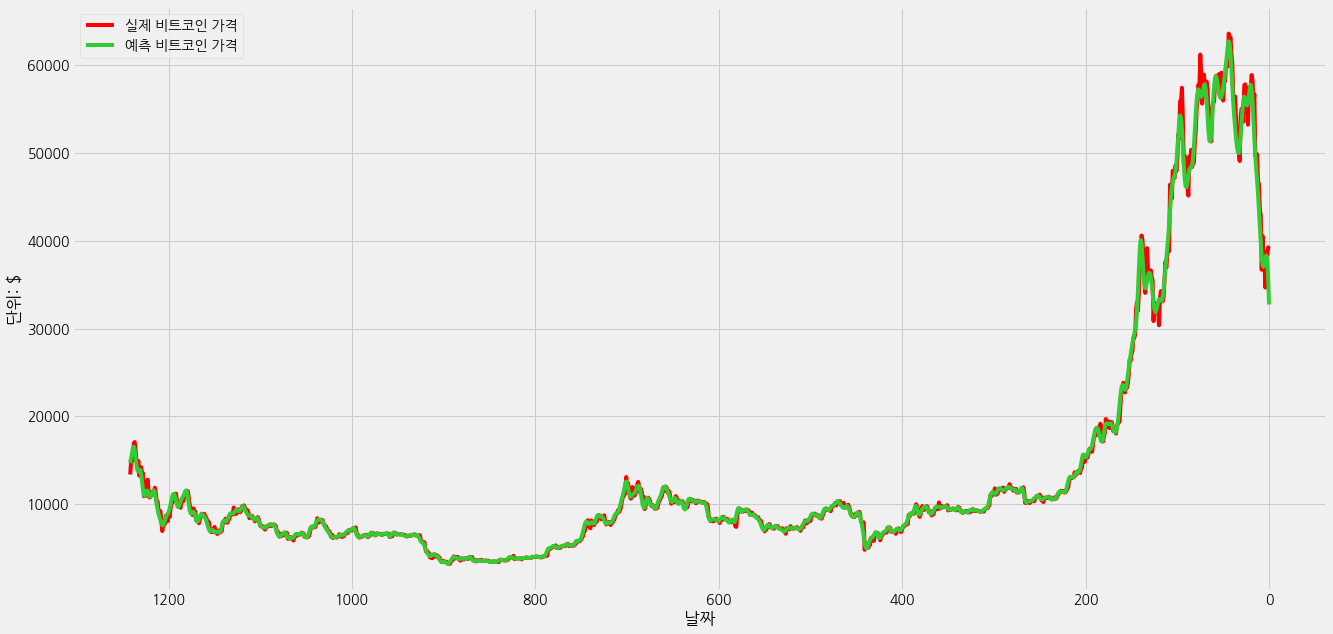

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# matplotlib 한글폰트 전역 설정
plt.rcParams["font.family"]= 'NanumGothic'
plt.rcParams['font.size'] = 14.
plt.rcParams['axes.titlesize'] = 24.
plt.rcParams['axes.labelsize'] = 18.

# 플롯 스타일 설정
plt.style.use('fivethirtyeight')

# x축 지정
x_plot = np.arange(1243)

# y축 정규화
y_plot = rbf_svr.predict(x_plot.reshape((-1,1)))

# 플롯 구성
plt.figure(figsize=(20,10))
plt.gca().invert_xaxis()
plt.xlabel('날짜')
plt.ylabel('단위: $')

# 예측 데이터 그래프 시각화
plt.plot(x_plot, btc['close'], color='red', label='실제 비트코인 가격')
plt.plot(x_plot, y_plot, color='limegreen', label='예측 비트코인 가격')
plt.legend()

plt.show()